In [3]:
import numpy as np
import pandas as pd
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) 

In [4]:
# Importing the Heart Dataset.
data=pd.read_csv("Heart.csv")

In [5]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


# Here we will consider AHD as the Target variable. So we will perform Classification for the following dataset.

In [7]:
# Converting the categorical target variable into a dummy variable.
data['ahd']=data.AHD.map(lambda x:1 if x=='Yes' else 0)

In [8]:
data.head(2)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1


In [9]:
data.ahd.value_counts()

0    164
1    139
Name: ahd, dtype: int64

In [10]:
# Converting the below variables into String for making them a dummy variable.
data['RestECG']=data['RestECG'].astype(str)
data['Slope']=data['Slope'].astype(str)
data['Ca']=data['Ca'].astype(str)

In [11]:
datacol=list(data.columns)

In [12]:
datacol

['Unnamed: 0',
 'Age',
 'Sex',
 'ChestPain',
 'RestBP',
 'Chol',
 'Fbs',
 'RestECG',
 'MaxHR',
 'ExAng',
 'Oldpeak',
 'Slope',
 'Ca',
 'Thal',
 'AHD',
 'ahd']

In [13]:
# Here we remove the unnecessary variable as well the target variable so we can have all the predictors at one place.
datacol.remove('Unnamed: 0')

In [14]:
datacol.remove('AHD')
datacol.remove('ahd')

In [15]:
datacol

['Age',
 'Sex',
 'ChestPain',
 'RestBP',
 'Chol',
 'Fbs',
 'RestECG',
 'MaxHR',
 'ExAng',
 'Oldpeak',
 'Slope',
 'Ca',
 'Thal']

In [16]:
# Converting all the predictor variables into dummy variables.
data1=pd.get_dummies(data[datacol],drop_first=True)
len(data1.columns)

21

In [17]:
data1.head().T

,0,1,2,3,4
Age,63.0,67.0,67.0,37.0,41.0
Sex,1.0,1.0,1.0,1.0,0.0
RestBP,145.0,160.0,120.0,130.0,130.0
Chol,233.0,286.0,229.0,250.0,204.0
Fbs,1.0,0.0,0.0,0.0,0.0
MaxHR,150.0,108.0,129.0,187.0,172.0
ExAng,0.0,1.0,1.0,0.0,0.0
Oldpeak,2.3,1.5,2.6,3.5,1.4
ChestPain_nonanginal,0.0,0.0,0.0,1.0,0.0
ChestPain_nontypical,0.0,0.0,0.0,0.0,1.0


In [18]:
# Assigning y & x variables to target and the predictors.
y=data.ahd
x=data1

In [19]:
from sklearn.cross_validation import train_test_split

C:\Users\Rohan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
# Splitting the target variable and the predictor variable into train and test data of ratio 70:30.
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3)

In [21]:
len(y_test)

91

In [22]:
len(y_train)

212

In [23]:
y_train[0:12]

238    0
28     0
173    0
235    1
130    0
177    1
14     0
108    1
155    1
85     0
244    0
10     0
Name: ahd, dtype: int64

# Build a logistic regression model

In [24]:
import statsmodels.api as sm

C:\Users\Rohan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [25]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

In [26]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.284905
         Iterations 8


In [27]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    ahd   No. Observations:                  212
Model:                          Logit   Df Residuals:                      190
Method:                           MLE   Df Model:                           21
Date:                Sun, 10 Jun 2018   Pseudo R-squ.:                  0.5883
Time:                        13:00:38   Log-Likelihood:                -60.400
converged:                       True   LL-Null:                       -146.71
                                        LLR p-value:                 8.011e-26
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.9239      3.605     -0.811      0.417      -9.989       4.142
Age                     -0.0250      0.035     -0.719      0.472      -0.093       0.043
Sex                      2.0953      0.783      2.676      0.007       0.561       3.630
RestBP                   0.0241      0.014      1.671      0.095      -0.004       0.052
Chol                     0.0043      0.005      0.864      0.387      -0.005       0.014
Fbs                     -0.4729      0.668     -0.708      0.479      -1.782       0.836
MaxHR                   -0.0299      0.016     -1.832      0.067      -0.062       0.002
ExAng                    1.1210      0.620      1.807      0.071      -0.095       2.337
Oldpeak                  0.0927      0.316      0.294      0.769      -0.526       0.711
ChestPain_nonanginal    -2.7241      0.756     -3.605      0.000      -4.205      -1.243
ChestPain_nontypical    -0.9408      0.653     -1.440      0.150      -2.221       0.339
ChestPain_typical       -3.0854      0.971     -3.178      0.001      -4.988      -1.183
RestECG_1                1.8172      2.454      0.740      0.459      -2.993       6.628
RestECG_2                0.6843      0.521      1.313      0.189      -0.337       1.705
Slope_2                  2.0235      0.659      3.072      0.002       0.732       3.315
Slope_3                  1.3757      1.158      1.188      0.235      -0.894       3.646
Ca_1.0                   2.3382      0.723      3.234      0.001       0.921       3.755
Ca_2.0                   4.3618      1.049      4.157      0.000       2.305       6.418
Ca_3.0                   1.2062      1.031      1.170      0.242      -0.815       3.227
Ca_nan                  -2.5561      1.989     -1.285      0.199      -6.455       1.343
Thal_normal              0.6865      0.966      0.711      0.477      -1.206       2.579
Thal_reversable          2.5988      0.968      2.684      0.007       0.701       4.497
========================================================================================
"""

# Find significant variables

In [28]:
# Here we will create a user-defined function to get the significant variables whose p-values are less than 0.05.
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [29]:
var_p_vals_df= pd.DataFrame( lg.pvalues )
var_p_vals_df

,0
const,0.417313
Age,0.472103
Sex,0.007447
RestBP,0.094810
Chol,0.387437
Fbs,0.478709
MaxHR,0.067009
ExAng,0.070808
Oldpeak,0.768902
ChestPain_nonanginal,0.000312


In [30]:
# The resultant variables are having p-values less than 0.05.
significant_vars = get_significant_vars( lg )
significant_vars

['Sex',
 'ChestPain_nonanginal',
 'ChestPain_typical',
 'Slope_2',
 'Ca_1.0',
 'Ca_2.0',
 'Thal_reversable']

# Predict Test Data and Measure Accuracy

In [31]:
from sklearn import metrics

In [32]:
# Here we create a user-defined function to predict probabilities against the actualness of AHD disease.
def get_predictions( y_t, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_t,
                               "predicted_prob": model.predict( sm.add_constant( x_test ) ) } )
    return y_pred_df

In [33]:
# Predicting probabilities using the test data of target variable(y_test) and the regression model(lg).
y_pred_df = get_predictions( y_test, lg )

In [34]:
y_pred_df[0:10]

,actual,predicted_prob
267,1,0.274176
214,1,0.449093
69,1,0.189566
203,0,0.019902
232,1,0.082139
216,0,0.002314
24,1,0.999841
234,0,0.015787
52,1,0.758654
138,1,0.982691


In [35]:
# Here we are calculating the predicted value based on the predicted probability by keeping the threshold value (probability) > 0.5.
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [36]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
267,1,0.274176,0
214,1,0.449093,0
69,1,0.189566,0
203,0,0.019902,0
232,1,0.082139,0
216,0,0.002314,0
24,1,0.999841,1
234,0,0.015787,0
52,1,0.758654,1
138,1,0.982691,1


# Create confusion matrix to find out Sensitivity and specificity

In [37]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 

In [38]:
# Creting a user-defined function for confusion matrix.
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

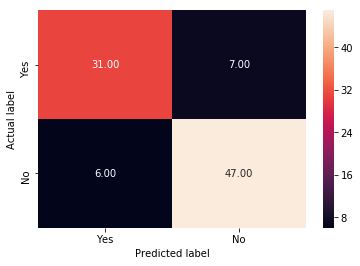

In [39]:
# Here we create a confusion matrix for the actual and the predicted values.
draw_cm( y_pred_df.actual, y_pred_df.predicted )

# In the above confusion matrix , we observe two kind of errors: one where there is no actual disease but the prediction said that the patient has AHD disease ( TYpe 1 Error)
# Second, where the patient is actually suffering from AHD disease but the prediction said the otherwise. ( TYPE 2 Error)
# Here type 1 error is 6 while type 2 is 7.

Overall accuracy of the model:

In [40]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.86
Precision :  0.84
Recall :  0.82
Sensitivity :  0.82
Specificity :  0.89


# Predicted Probability distribution Plots for AHD patients and Non-AHD patients.

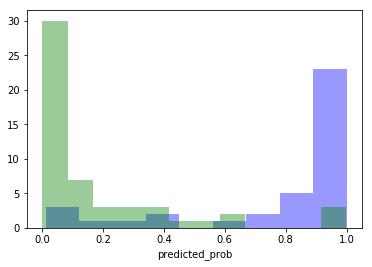

In [41]:
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g' )

# Draw ROC Plot

In [42]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.91

In [43]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

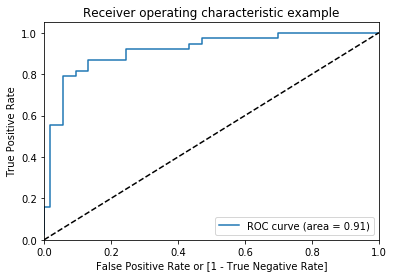

In [44]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

# The above ROC plot indicates that the current model for AHD disease is a good enough model.

In [45]:
thresholds[0:10]

array([0.99988757, 0.99984146, 0.99980458, 0.99958464, 0.99952705,
       0.99908409, 0.99881778, 0.99880865, 0.99864173, 0.99835396])

In [46]:
fpr[0:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01886792, 0.01886792, 0.01886792, 0.01886792])

In [47]:
tpr[0:10]

array([0.02631579, 0.05263158, 0.07894737, 0.10526316, 0.13157895,
       0.15789474, 0.15789474, 0.18421053, 0.21052632, 0.23684211])

In [48]:
# In the previous confusion matrix we had the type 2 error ( which is more critical than type 1) at 7. 
# We will try to reduce the type 2 error by reducing the threshold of predicted probability to 0.10.
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.10 else 0)

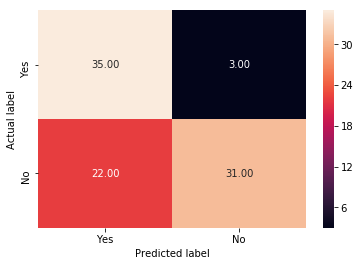

In [49]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new )

In [120]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted_new ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted_new ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted_new ), 2 ) )

cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_new, [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.68
Precision :  0.56
Recall :  0.92
Sensitivity :  0.92
Specificity :  0.53


# Here we have reduced the type 2 error to 3, while the type 1 error increased to 22. But it is better to deal with patients who actually required no ADH disease treatment than the patients who can go untreated for the AHD disease( type2 error ).
# Here reducing the patients who can go untreated is far more important than the accuracy of the model.
# Accuracy of the model is 68%. Recall and Sensitivity are 92%, which are good enough numbers for the model.